In [66]:
import numpy as np 
from pse import * 
import numpy as np
import itertools
import math
import networkx as nx
import matplotlib.pyplot as plt

In [90]:
import numpy as np

#def pseudo_dist(u,v, tk):
#    return np.sqrt(np.linalg.norm(u[:tk]-v[:tk])**2 - np.linalg.norm(u[tk:]-v[tk:])**2)

def pseudo_dist(u,v,tk):
    return np.abs(np.linalg.norm(u[:tk]-v[:tk])**2 - np.linalg.norm(u[tk:]-v[tk:])**2)

def pseudo_dot(u,v,tk):
    return np.dot(u[:tk],v[:tk]) - np.dot(u[tk:],v[tk:])

def pse_cov(X,tk):
    # assuming uniform p
    #X is n\times d
    n, d= X.shape
    J = np.eye(X.shape[1])
    J[tk:] = -1*J[tk:]
    #print(J)
    mu = np.mean(X,axis=0)
    X = X-mu 
    X = np.transpose(X) # d\times n
    return (1/n)*np.dot(np.dot(X,np.transpose(X)), J )
    

def pseudo_embedding(D, dim=0):
    n = D.shape[0]
    
    bilin_form = np.zeros((n, n))
    for i in range(0,n):
        for j in range(0,n):
             bilin_form[i,j] = 1/2 * (D[0,i]+ D[0,j]- D[i,j])
    w, v = np.linalg.eigh(bilin_form)
    w = np.real(w)
    print('max eigen value of M ', max(np.abs(w)))
    #print(bilin_form)
    
    idx_pos = np.argwhere((w > 0) & (w > 10e-12)).flatten()
    idx_neg = np.argwhere((w < 0) & (w < -10e-12)).flatten()
    idx_zero = np.argwhere((10e-12 >= w) & (-10e-12 <= w)).flatten()
    idx = np.concatenate([idx_pos, idx_neg])
    
    w = w[idx]
    # should be refactored
    idx_pos = np.argwhere((w > 0) & (w > 10e-12)).flatten()
    idx_neg = np.argwhere((w < 0) & (w < -10e-12)).flatten()
    v = v[:,idx]
    
    w_abs = np.abs(w)
    if dim != 0: # take some smaller number of dimensons than all
        idx_sorted = w_abs.argsort()[::-1]
        idx_top = idx_sorted[:dim]
        idx_pos = np.intersect1d(idx_top, idx_pos)
        idx_neg = np.intersect1d(idx_top, idx_neg)

    pdim, ndim = len(idx_pos), len(idx_neg)
    print(pdim,ndim)

    X = v[:, :pdim+ndim] @ np.sqrt(np.abs(np.diag(w[:pdim+ndim])))
    return X,pdim 
    #return np.concatenate((np.expand_dims(np.zeros(pdim+ndim), axis=0), X), axis=0), pdim

In [80]:
D = np.array([[0,1,1],[2,0,1],[1,2,0]])
D 
X,tk = pseudo_embedding(D,3)
X
print(X,tk)
D2 = [ [pseudo_dist(X[i,:],X[j,:],tk) for j in range(3)] for i in range(3)]
print(D2)
pse_cov(X,tk)

eigen values  [-0.20710678  1.          1.20710678]
2 1
[[ 0.         -0.42044821 -0.42044821]
 [ 0.          1.01505177 -0.17415535]
 [ 1.          0.          0.        ]] 2
[[0.0, 2.0000000000000004, 1.0000000000000002], [2.0000000000000004, 0.0, 1.9999999999999998], [1.0000000000000002, 1.9999999999999998, 0.0]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0. -0. -1.]]


array([[ 0.66666667, -0.19820119, -0.19820119],
       [-0.19820119,  1.08925565, -0.11785113],
       [ 0.19820119,  0.11785113, -0.08925565]])

In [9]:
p = np.array([0.2,0.5,0.3]) 

In [34]:
J = np.eye(3) 
J[2][2]=-1

21
max eigen value of M  39.69771560359223
0 1
[[-0.0952381]]
max eigen val -0.09523809523809472
max eigen value of M  39.69771560359223
1 1
[[ 9.52380952e-02  2.31296463e-17]
 [-2.31296463e-17 -9.52380952e-02]]
max eigen val 0.09523809523809472
max eigen value of M  39.69771560359223
2 1
[[ 9.52380952e-02 -2.31296463e-17 -1.32995466e-17]
 [-2.31296463e-17  9.52380952e-02  8.59101150e-18]
 [ 1.32995466e-17 -8.59101150e-18 -9.52380952e-02]]
max eigen val 0.09523809523809508
max eigen value of M  39.69771560359223
3 1
[[ 9.52380952e-02 -1.85037171e-17  1.38777878e-17  3.11837196e-18]
 [-1.85037171e-17  9.52380952e-02 -1.05735526e-17  5.28677631e-18]
 [ 1.38777878e-17 -1.05735526e-17  9.52380952e-02 -6.60847038e-19]
 [-3.11837196e-18 -5.28677631e-18  6.60847038e-19 -9.52380952e-02]]
max eigen val 0.0952380952380952
max eigen value of M  39.69771560359223
4 1
[[ 9.52380952e-02 -1.98254112e-17  1.39603937e-17 -3.13902343e-18
  -8.26058798e-19]
 [-1.98254112e-17  9.52380952e-02 -1.12343997e-

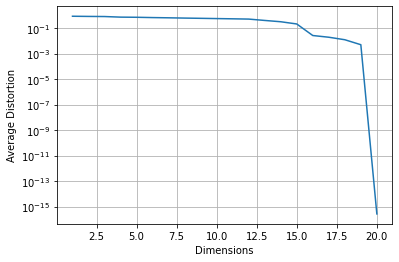

In [91]:
T = nx.balanced_tree(4,2)
D_tree = nx.floyd_warshall_numpy(T)
'''
# larger experiment on cs phd dataset
Go = nx.read_edgelist("data/csphd.txt", nodetype = int)
G = max(nx.connected_components(G), key=len)
#D_tree = nx.floyd_warshall_numpy(G)
'''

D = D_tree**2
n = D_tree.shape[0]
err = np.zeros(n-1)
print(n)
for dim in range(1,n):
    X, tk = pseudo_embedding(D, dim=dim)
    rec = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            rec[i,j] = pseudo_dist(X[i],X[j],tk) #np.abs(np.linalg.norm(X[i,:tk]-X[j,:tk])**2 - np.linalg.norm(X[i,tk:]-X[j,tk:])**2)
            if i != j:
                err[dim-1] += np.abs((np.sqrt(D[i,j])-np.sqrt(rec[i,j])))/np.sqrt(D[i,j])
                #err += np.abs((np.sqrt(D[i,j])-np.sqrt(rec[i,j])))/np.sqrt(D[i,j])
    err[dim-1]/= (n*(n-1))
    #err/= (n*(n-1))
    S = pse_cov(X,tk)
    print(S) 
    l,v = np.linalg.eigh(S)
    print('max eigen val',max(l))

print(err)
plt.semilogy(list(range(1,n)), err)
plt.xlabel('Dimensions')
plt.ylabel('Average Distortion')
plt.grid()


In [76]:
pse_cov(X,tk)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0. -0. -1.]]


array([[ 0.66666667, -0.19820119, -0.19820119],
       [-0.19820119,  1.08925565, -0.11785113],
       [ 0.19820119,  0.11785113, -0.08925565]])

In [33]:
D 

array([[0, 2, 1],
       [2, 0, 1],
       [1, 1, 0]])

In [5]:
l,U = np.linalg.eig(D)

In [34]:
l_abs = abs(l)
idx_p = np.where(l>0)[0]
idx_n = np.where(l<0)[0]
print(idx_p,idx_n)
print(U)
print(np.sqrt(l_abs)) 
V_p = np.transpose(np.sqrt(l_abs[idx_p])*np.transpose(U[idx_p,:] ))
V_n = np.transpose(np.sqrt(l_abs[idx_n])*np.transpose(U[idx_n,:] ))
print(V_p)
print(V_n)

[1 2] [0]
[[ 0.7154086  -0.6717612  -0.19216509]
 [-0.6611152  -0.56181831 -0.49727948]
 [-0.2260912  -0.48280128  0.84604119]]
[1.07900322 1.84157063 1.33148998]
[[-1.21749033 -1.03462809 -0.91577529]
 [-0.30103816 -0.64284507  1.12649536]]
[[ 0.77192818 -0.72483249 -0.20734675]]


In [39]:
T = np.vstack((V_p,V_n))

In [37]:
J = np.eye(3)
J[2][2]=-1 
J 

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0., -1.]])

In [40]:
np.dot(T,np.dot(T,J))

array([[ 1.08683248,  2.58853896, -0.13932685],
       [ 1.42960546, -0.09180812,  0.68205384],
       [-0.88166966, -0.18241192,  1.48044052]])

In [47]:
def dist(u,v,i):
    return np.linalg.norm(u[:i]-v[:i])**2 - np.linalg.norm(u[i:]-v[i:])**2


In [48]:
dist(T[0],T[1],2)

-3.177490913096191